In [1]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import math
from collections import Counter
import os
import sys

# Notebook path
current_directory = os.getcwd()
# Get one behind for calling the other modules
root_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(root_directory)

#Classes
from model_class.UD import UD
from model_class.Variety import Variety

#Network and measures
from to_get_data.net_construction_vis_measures import *
#Agrobiodiversity
from to_get_data.agrobiodiversity_data import *

In [34]:
#### Parametros
n = 30
prob_morte = 0.06
average_children = 4
t = 500

#### Initialization
## Comunidades
UD.uds = {}
comunidades_disponibles = [i for i in range(1, 6) for _ in range(6)]
print(comunidades_disponibles)
instancias_ud = []
for id_ud in range(1, n + 1):
    instancias_ud.append(UD(id_ud, average_children, comunidades_disponibles.pop(0)))
## Variedades y repartirlas entre las comunidades
for id_ud, ud in UD.uds.items():
    for _ in range(5):
        ud.varieties.append(Variety())

for i in range (1, (t)):
    uds_copy = dict(UD.uds) #As UDs existentes no tempo n
    any_ud_active = False # Flag to see if the simulation went to extintion
    for id_ud, ud in uds_copy.items():
        if ud.activa == True:
            any_ud_active = True
            ud.ter_filho()
            ud.buscar_ud(average_children, 50, True)
            ud.incrementar_idade()
            ud.death_probability(prob_morte)
vivas = [ud for id, ud in uds_copy.items() if ud.activa]
print(f"finished with {len(vivas)} vivas ")

[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5]
finished with 408 vivas 


408


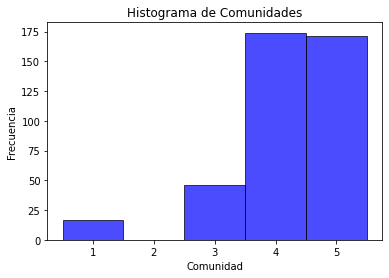

In [35]:
print(len([ud for id, ud in uds_copy.items() if ud.activa]))
vivas = [ud for id, ud in uds_copy.items() if ud.activa]
comunidades_lista = [ud.community for ud in vivas]
# Final distribution of UDs for community
plt.hist(comunidades_lista, bins=range(1, 7), align='left', alpha=0.7, color='blue', edgecolor='black')
plt.title('Histograma de Comunidades')
plt.xlabel('Comunidad')
plt.ylabel('Frecuencia')
plt.show()

In [36]:
175*2

350

In [3]:
import random
import matplotlib.pyplot as plt

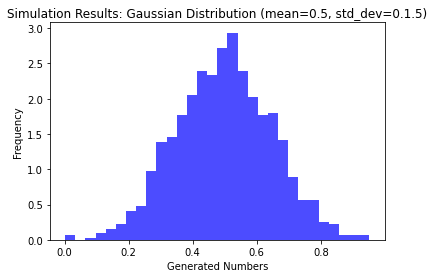

In [11]:
def random_gaussian_within_range(mean, std_deviation):
    while True:
        number = random.gauss(mean, std_deviation)
        if 0 <= number <= 1:
            return number

# Simulation with 1000 tries
mean_value = 0.5
std_deviation_value = 0.15
simulation_results = [random_gaussian_within_range(mean_value, std_deviation_value) for _ in range(1000)]

# Plotting the results
plt.hist(simulation_results, bins=30, density=True, alpha=0.7, color='blue')
plt.title('Simulation Results: Gaussian Distribution (mean=0.5, std_dev=0.1.5)')
plt.xlabel('Generated Numbers')
plt.ylabel('Frequency')
plt.show()

In [1]:
import random
import numpy as np
from collections import namedtuple

In [66]:
# For the new varieties
VarietyData = namedtuple('VarietyData', ['hs_constant', 'quality'])

class Variety:
    def __init__(self):
        self.hs_constant, self.quality = self.set_hsc_qual()
        
    def set_hsc_qual(self): #For the hs_constant and quality. 
        hsc = np.zeros(3)
        for i in range(len(hsc)):
            while True:
                number = random.gauss(0.5, 0.15)
                if 0 <= number <= 1:
                    hsc[i] = number
                    break
        while True:
                number = random.gauss(0.5, 0.15)
                if 0 <= number <= 1:
                    quality = number
                    break
        return hsc, quality
        
    def set_id():
        pass
        
    def mutation(self):
        pass
    def newVariety(self, new_variety):
        self.hs_constant = new_variety.hs_constant
        self.quality = new_variety.quality

#This function is ouside the class but is related to it!!! 
def cruzamento(variedad1, variedad2, change):
    new_hsconstant = []
    new_quality = []
    for j in range(3):  # Three numbers for each variety
        new_value = (variedad1.hs_constant[j] + variedad2.hs_constant[j]) / 2 + change * (2 * random.uniform(0, 1) - 1)
        while new_value < 0 or new_value > 1:
            new_value = (variedad1.hs_constant[j] + variedad2.hs_constant[j]) / 2 + change * (2 * random.uniform(0, 1) - 1)
        new_hsconstant.append(new_value)
    new_quality = (variedad1.quality + variedad2.quality) / 2 + change * random.uniform(0, 1)
    while new_quality < 0 or new_quality > 1:
        new_quality = (variedad1.quality + variedad2.quality) / 2 + change * random.uniform(0, 1)

    return VarietyData(hs_constant=np.array(new_hsconstant), quality=new_quality)

#Function to introduce a new variety. This function is related to the introduction of varieties
def intr_new_variety():
    if  random.uniform(0,1) < 0.5: #Probability parameter is not specified yet.
        return Variety()

In [69]:
intr_new_variety()

In [15]:
variedades = [Variety() for i in range(5)]

In [16]:
variedades

In [12]:
a = cruzamento(variedades[0], variedades[1], 0.5)

NameError: name 'cruzamento' is not defined

In [27]:
a.hs_constant 

array([0.64464573, 0.46359038, 0.64300136])

In [45]:
print (f'{variedades[0].hs_constant} and {variedades[0].quality}')
print (f'{variedades[1].hs_constant} and {variedades[1].quality}')
print (f'{variedades[2].hs_constant} and {variedades[2].quality}')

print('Now the mix!')

a = cruzamento(variedades[0], variedades[1], 0.01)
print(a)

variedades[2].newVariety(a)
print (f'{variedades[2].hs_constant} and {variedades[2].quality}')

[0.50436353 0.50303938 0.64457133] and 0.7369571504668777
[0.77274399 0.4397489  0.63257319] and 0.5031991268484103
[0.63838813 0.46918215 0.63289366] and 0.6251529836248655
Now the mix!
VarietyData(hs_constant=array([0.64832076, 0.46243019, 0.63348907]), quality=0.6247511312331101)
[0.64832076 0.46243019 0.63348907] and 0.6247511312331101


In [62]:
variedades[2].hs_constant

array([0.53710425, 0.29142013, 0.55327337])

Tengo que pensar como representar el apego social. Esto puede ser justificado al decir que la cualidad es diferente. Este apego social puede estar relacionado a la familia o puede aparecer aleatoriamente. 
Tambien va a determinar el nombre! 
Cruzamiento

In [15]:
from collections import namedtuple

VarietyData = namedtuple('VarietyData', ['half_saturation', 'quality'])

# Crear una instancia de VarietyData
variety_data = VarietyData(half_saturation=[0.1, 0.2, 0.3], quality=0.8)

# Acceder a los atributos
print(variety_data.half_saturation)
print(variety_data.quality)

[0.1, 0.2, 0.3]
0.8


In [9]:
variedades = [Variety() for i in range(5)]

In [14]:
for i in range(len(variedades)):
    print(variedades[i].quality)

0.398808233373802
0.6046906028332067
0.543402589250189
0.5338098908937995
0.5138043887033128
